In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combinex_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")
# an inner merge is appropriate here because both clinical results and drug identification
# are required in order for the data to have any meaning

# Display the data table for preview
combinex_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# There is a data problem that was discovered during the build of the count data frame, 
# namely that mouse ID "g989" appears in the mouse_drug file twice, with different drugs.
# until we get data correction, we are dropping mouse id "g989"

mouse_drug_fixed_df = mouse_drug_df.loc[mouse_drug_df["Mouse ID"] != "g989", : ]

# There should now be 248 mice
print (mouse_drug_fixed_df.count())

Mouse ID    248
Drug        248
dtype: int64


In [3]:
# Combine the "fixed" data into a single dataset
combine_df = pd.merge(mouse_drug_fixed_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview
combine_df.head()
# this will be the data used to produce the requested charts

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_drug_timepoint_gb = combine_df.groupby(['Drug','Timepoint'])
mean_tumor_volume = combine_drug_timepoint_gb['Tumor Volume (mm3)'].mean()


# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume_df.reset_index(inplace=True)

# Preview DataFrame
mean_tumor_volume_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
sem_tumor_volume = combine_drug_timepoint_gb['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_tumor_volume_df = pd.DataFrame(sem_tumor_volume)
sem_tumor_volume_df.reset_index(inplace=True)

# Preview DataFrame
sem_tumor_volume_df



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
# there has got to be a more elegant way to do this;
# meanwhile, at least it gets the job done
Stelasyn_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Stelasyn"])
Stelasyn_df = Stelasyn_df.rename(columns={"Tumor Volume (mm3)":"Stelasyn"})
del Stelasyn_df["Drug"]

Naftisol_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Naftisol"])
Naftisol_df = Naftisol_df.rename(columns={"Tumor Volume (mm3)":"Naftisol"})
del Naftisol_df["Drug"]

Ketapril_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Ketapril"])
Ketapril_df = Ketapril_df.rename(columns={"Tumor Volume (mm3)":"Ketapril"})
del Ketapril_df["Drug"]

Capomulin_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Capomulin"])
Capomulin_df = Capomulin_df.rename(columns={"Tumor Volume (mm3)":"Capomulin"})
del Capomulin_df["Drug"]

Infubinol_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Infubinol"])
Infubinol_df = Infubinol_df.rename(columns={"Tumor Volume (mm3)":"Infubinol"})
del Infubinol_df["Drug"]

Ceftamin_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Ceftamin"])
Ceftamin_df = Ceftamin_df.rename(columns={"Tumor Volume (mm3)":"Ceftamin"})
del Ceftamin_df["Drug"]

Propriva_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Propriva"])
Propriva_df = Propriva_df.rename(columns={"Tumor Volume (mm3)":"Propriva"})
del Propriva_df["Drug"]

Zoniferol_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Zoniferol"])
Zoniferol_df = Zoniferol_df.rename(columns={"Tumor Volume (mm3)":"Zoniferol"})
del Zoniferol_df["Drug"]

Ramicane_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Ramicane"])
Ramicane_df = Ramicane_df.rename(columns={"Tumor Volume (mm3)":"Ramicane"})
del Ramicane_df["Drug"]

Placebo_df = pd.DataFrame(mean_tumor_volume_df[mean_tumor_volume_df["Drug"] == "Placebo"])
Placebo_df = Placebo_df.rename(columns={"Tumor Volume (mm3)":"Placebo"})
del Placebo_df["Drug"]

reformatted_df = pd.merge(Capomulin_df, Ceftamin_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Infubinol_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Ketapril_df,on="Timepoint")                                   
reformatted_df = pd.merge(reformatted_df,Naftisol_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Placebo_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Propriva_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Ramicane_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Stelasyn_df,on="Timepoint")
reformatted_df = pd.merge(reformatted_df,Zoniferol_df,on="Timepoint")

reformatted_df

        


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [7]:
# as we have done with the means, so shall we do with the standard errors
Stelasyn_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Stelasyn"])
Stelasyn_se_df = Stelasyn_se_df.rename(columns={"Tumor Volume (mm3)":"Stelasyn"})
del Stelasyn_se_df["Drug"]

Naftisol_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Naftisol"])
Naftisol_se_df = Naftisol_se_df.rename(columns={"Tumor Volume (mm3)":"Naftisol"})
del Naftisol_se_df["Drug"]

Ketapril_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Ketapril"])
Ketapril_se_df = Ketapril_se_df.rename(columns={"Tumor Volume (mm3)":"Ketapril"})
del Ketapril_se_df["Drug"]

Capomulin_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Capomulin"])
Capomulin_se_df = Capomulin_se_df.rename(columns={"Tumor Volume (mm3)":"Capomulin"})
del Capomulin_se_df["Drug"]

Infubinol_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Infubinol"])
Infubinol_se_df = Infubinol_se_df.rename(columns={"Tumor Volume (mm3)":"Infubinol"})
del Infubinol_se_df["Drug"]

Ceftamin_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Ceftamin"])
Ceftamin_se_df = Ceftamin_se_df.rename(columns={"Tumor Volume (mm3)":"Ceftamin"})
del Ceftamin_se_df["Drug"]

Propriva_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Propriva"])
Propriva_se_df = Propriva_se_df.rename(columns={"Tumor Volume (mm3)":"Propriva"})
del Propriva_se_df["Drug"]

Zoniferol_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Zoniferol"])
Zoniferol_se_df = Zoniferol_se_df.rename(columns={"Tumor Volume (mm3)":"Zoniferol"})
del Zoniferol_se_df["Drug"]

Ramicane_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Ramicane"])
Ramicane_se_df = Ramicane_se_df.rename(columns={"Tumor Volume (mm3)":"Ramicane"})
del Ramicane_se_df["Drug"]

Placebo_se_df = pd.DataFrame(sem_tumor_volume_df[sem_tumor_volume_df["Drug"] == "Placebo"])
Placebo_se_df = Placebo_se_df.rename(columns={"Tumor Volume (mm3)":"Placebo"})
del Placebo_se_df["Drug"]

reformatted_se_df = pd.merge(Capomulin_se_df, Ceftamin_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Infubinol_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Ketapril_se_df,on="Timepoint")                                   
reformatted_se_df = pd.merge(reformatted_se_df,Naftisol_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Placebo_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Propriva_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Ramicane_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Stelasyn_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Zoniferol_se_df,on="Timepoint")

reformatted_se_df


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


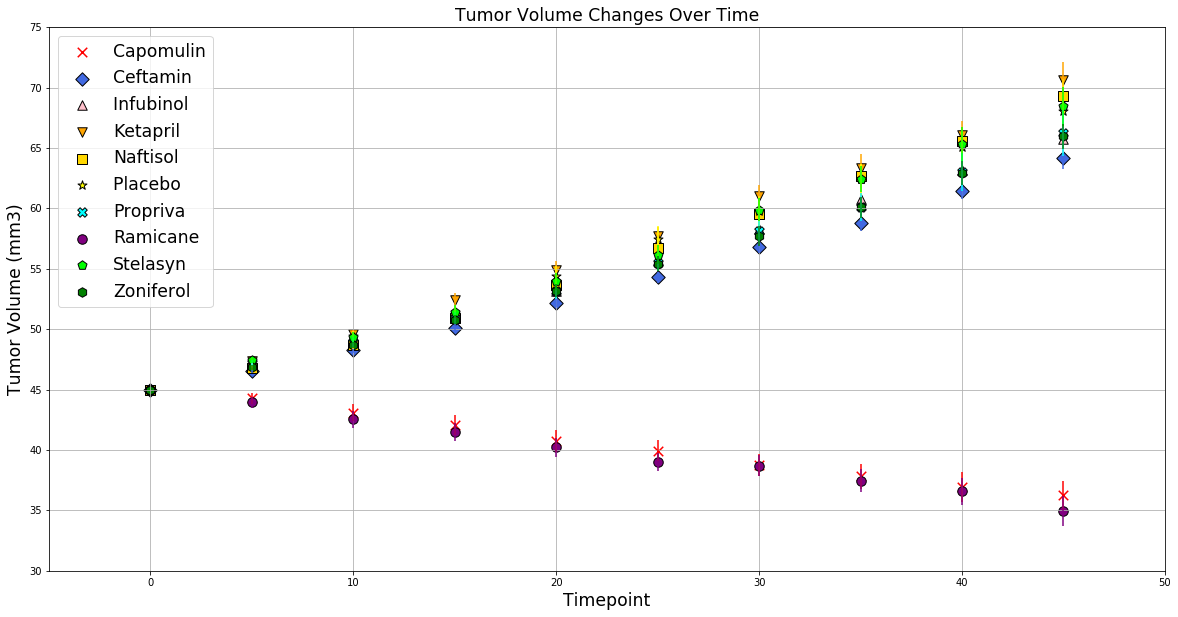

In [8]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(20,10))

plt.scatter(reformatted_df['Timepoint'], reformatted_df['Capomulin'], s=90, marker='x', facecolors='red',edgecolors="black",label="Capomulin")
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Ceftamin'], s=90, marker='D', facecolors='royalblue',edgecolors="black",label='Ceftamin')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Infubinol'], s=90, marker='^', facecolors='pink',edgecolors="black",label='Infubinol ')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Ketapril'], s=90, marker='v', facecolors='orange',edgecolors="black",label='Ketapril')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Naftisol'], s=90, marker='s', facecolors='gold',edgecolors="black",label='Naftisol')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Placebo'], s=90, marker='*', facecolors='yellow',edgecolors="black",label='Placebo ')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Propriva'], s=90, marker='X', facecolors='cyan',edgecolors="black",label='Propriva')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Ramicane'], s=90, marker='o', facecolors='purple',edgecolors="black",label='Ramicane')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Stelasyn'], s=90, marker='p', facecolors='lime',edgecolors="black",label='Stelasyn')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Zoniferol'], s=90, marker='h', facecolors='green',edgecolors="black",label='Zoniferol')
plt.legend(loc="upper left",fontsize="xx-large") 

plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Capomulin'],yerr=reformatted_se_df['Capomulin'],ecolor='red',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Ceftamin'],yerr=reformatted_se_df['Ceftamin'],ecolor='royalblue',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Infubinol'],yerr=reformatted_se_df['Infubinol'],ecolor='pink',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Ketapril'],yerr=reformatted_se_df['Ketapril'],ecolor='orange',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Naftisol'],yerr=reformatted_se_df['Naftisol'],ecolor='gold',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Placebo'],yerr=reformatted_se_df['Placebo'],ecolor='yellow',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Propriva'],yerr=reformatted_se_df['Propriva'],ecolor='cyan',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Ramicane'],yerr=reformatted_se_df['Ramicane'],ecolor='purple',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Stelasyn'],yerr=reformatted_se_df['Stelasyn'],ecolor='lime',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Zoniferol'],yerr=reformatted_se_df['Zoniferol'],ecolor='green',fmt='none')

plt.title("Tumor Volume Changes Over Time",fontsize="xx-large")
plt.xlabel("Timepoint",fontsize="xx-large")
plt.ylabel("Tumor Volume (mm3)",fontsize="xx-large")

plt.xlim(-5, 50)
plt.ylim(30, 75)

plt.grid()

# Save the Figure

plt.savefig("Tumor_Volume_Changes.png", bbox_inches="tight")


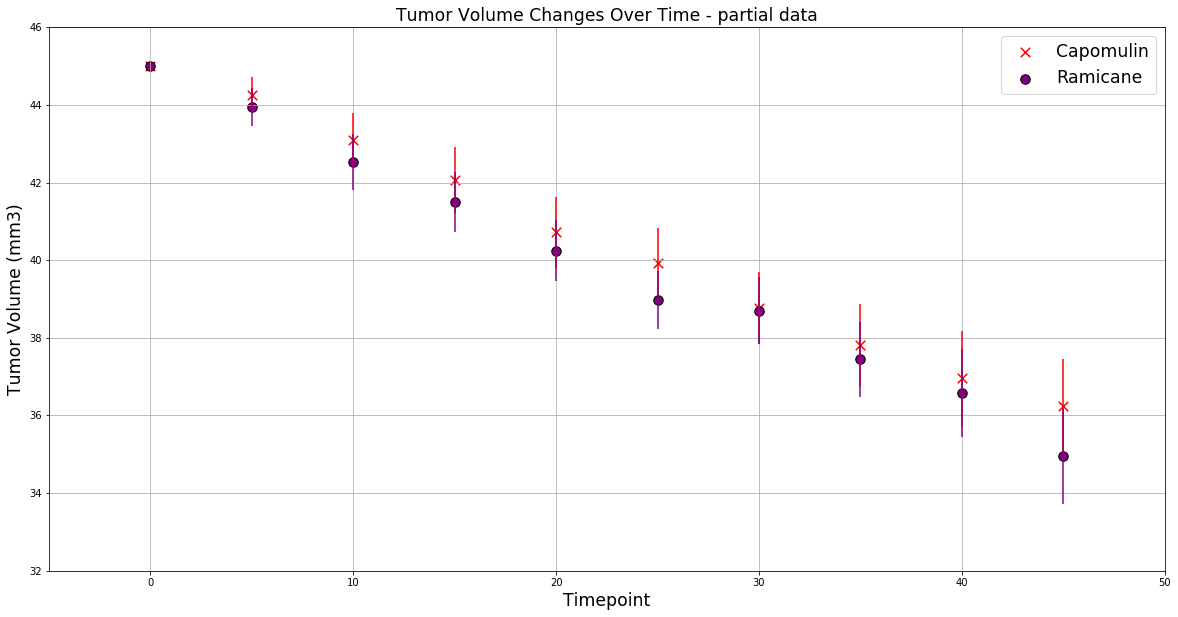

In [10]:
# The above chart is comprehensive, yet difficult to pick out details of individual drugs.  Let's separate them into
# smaller groups of drugs.

plt.figure(figsize=(20,10))

plt.scatter(reformatted_df['Timepoint'], reformatted_df['Capomulin'], s=90, marker='x', facecolors='red',edgecolors="black",label="Capomulin")
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Ramicane'], s=90, marker='o', facecolors='purple',edgecolors="black",label='Ramicane')
plt.legend(loc="best",fontsize="xx-large") 

plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Capomulin'],yerr=reformatted_se_df['Capomulin'],ecolor='red',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Ramicane'],yerr=reformatted_se_df['Ramicane'],ecolor='purple',fmt='none')

plt.title("Tumor Volume Changes Over Time - partial data",fontsize="xx-large")
plt.xlabel("Timepoint",fontsize="xx-large")
plt.ylabel("Tumor Volume (mm3)",fontsize="xx-large")

plt.xlim(-5, 50)
plt.ylim(32, 46)

plt.grid()

# Save the Figure

plt.savefig("Tumor_Volume_Changes_subset1.png", bbox_inches="tight")


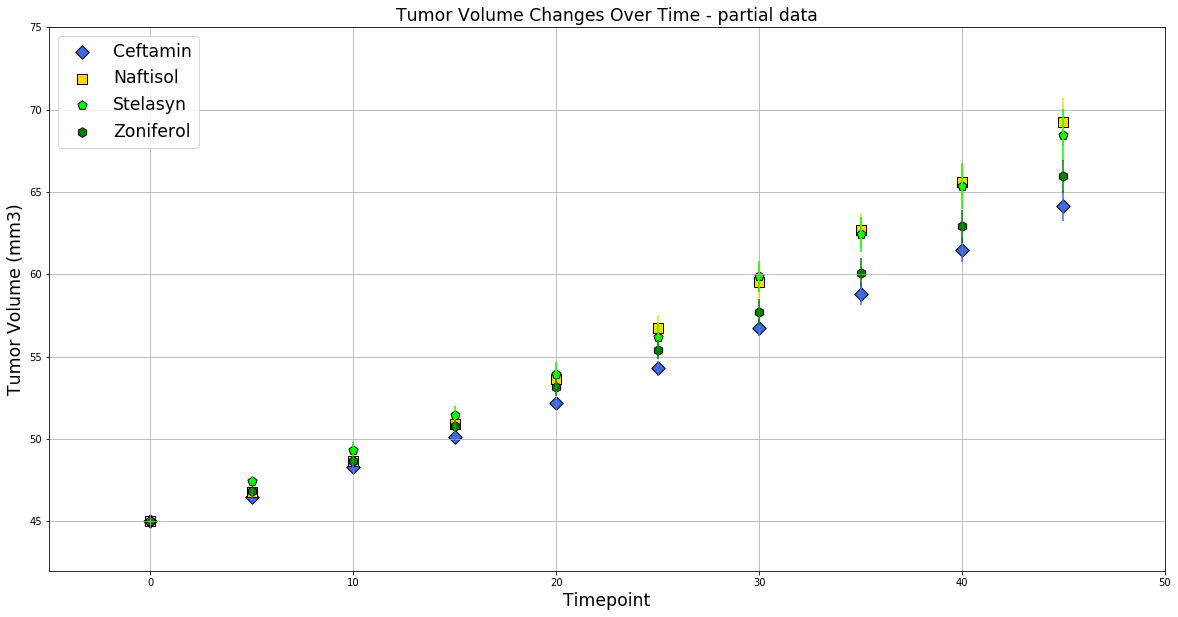

In [11]:
plt.figure(figsize=(20,10))

plt.scatter(reformatted_df['Timepoint'], reformatted_df['Ceftamin'], s=90, marker='D', facecolors='royalblue',edgecolors="black",label='Ceftamin')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Naftisol'], s=90, marker='s', facecolors='gold',edgecolors="black",label='Naftisol')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Stelasyn'], s=90, marker='p', facecolors='lime',edgecolors="black",label='Stelasyn')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Zoniferol'], s=90, marker='h', facecolors='green',edgecolors="black",label='Zoniferol')
plt.legend(loc="best",fontsize="xx-large") 

plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Naftisol'],yerr=reformatted_se_df['Naftisol'],ecolor='gold',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Ceftamin'],yerr=reformatted_se_df['Ceftamin'],ecolor='royalblue',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Stelasyn'],yerr=reformatted_se_df['Stelasyn'],ecolor='lime',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Zoniferol'],yerr=reformatted_se_df['Zoniferol'],ecolor='green',fmt='none')


plt.title("Tumor Volume Changes Over Time - partial data",fontsize="xx-large")
plt.xlabel("Timepoint",fontsize="xx-large")
plt.ylabel("Tumor Volume (mm3)",fontsize="xx-large")

plt.xlim(-5, 50)
plt.ylim(42, 75)

plt.grid()

# Save the Figure

plt.savefig("Tumor_Volume_Changes_subset3.png", bbox_inches="tight")


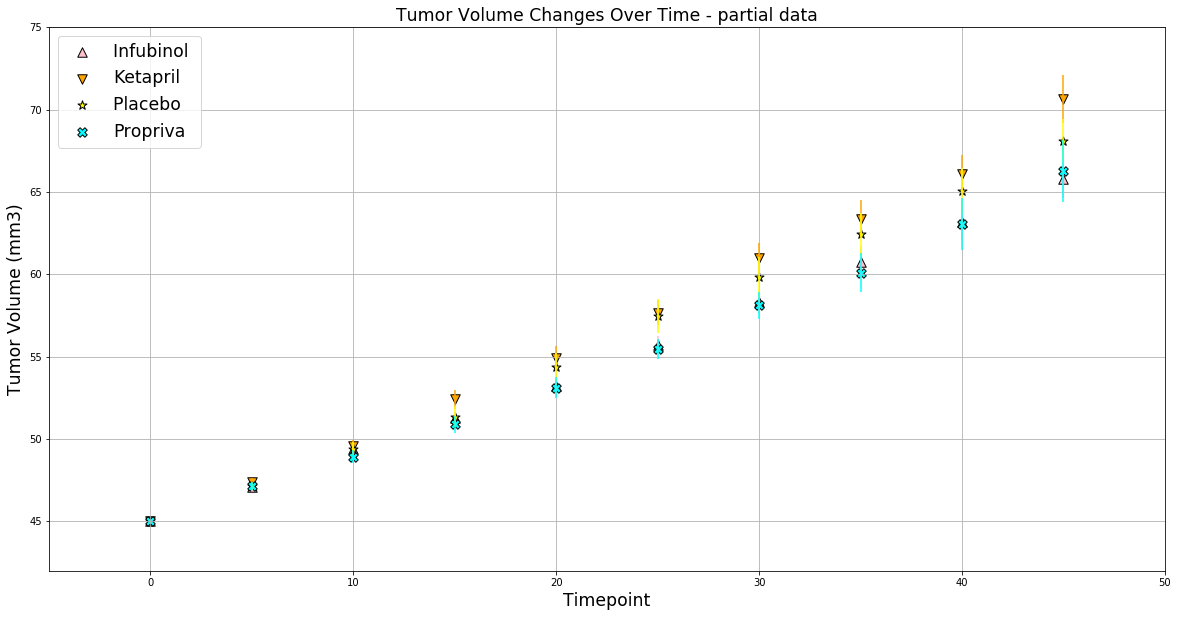

In [12]:
plt.figure(figsize=(20,10))

plt.scatter(reformatted_df['Timepoint'], reformatted_df['Infubinol'], s=90, marker='^', facecolors='pink',edgecolors="black",label='Infubinol ')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Ketapril'], s=90, marker='v', facecolors='orange',edgecolors="black",label='Ketapril')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Placebo'], s=90, marker='*', facecolors='yellow',edgecolors="black",label='Placebo ')
plt.scatter(reformatted_df['Timepoint'], reformatted_df['Propriva'], s=90, marker='X', facecolors='cyan',edgecolors="black",label='Propriva')
plt.legend(loc="best",fontsize="xx-large") 

plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Infubinol'],yerr=reformatted_se_df['Infubinol'],ecolor='pink',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Ketapril'],yerr=reformatted_se_df['Ketapril'],ecolor='orange',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Placebo'],yerr=reformatted_se_df['Placebo'],ecolor='yellow',fmt='none')
plt.errorbar(reformatted_df['Timepoint'], reformatted_df['Propriva'],yerr=reformatted_se_df['Propriva'],ecolor='cyan',fmt='none')

plt.title("Tumor Volume Changes Over Time - partial data",fontsize="xx-large")
plt.xlabel("Timepoint",fontsize="xx-large")
plt.ylabel("Tumor Volume (mm3)",fontsize="xx-large")

plt.xlim(-5, 50)
plt.ylim(42, 75)

plt.grid()

# Save the Figure
plt.savefig("Tumor_Volume_Changes_subset2.png", bbox_inches="tight")

# Truthfully though, these kinds of subset charts could be produced at will
# simply by commenting out all but the desired drug plt lines.  These charts
# just demonstrate what could be done.

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#   -- we still have the groupby from above -- 
mean_meta_sites = combine_drug_timepoint_gb['Metastatic Sites'].mean()

# Convert to DataFrame
mean_meta_sites_df = pd.DataFrame(mean_meta_sites)
mean_meta_sites_df.reset_index(inplace=True)

# Preview DataFrame
mean_meta_sites_df



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta_sites = combine_drug_timepoint_gb['Metastatic Sites'].sem()

# Convert to DataFrame
sem_meta_sites_df = pd.DataFrame(sem_meta_sites)
sem_meta_sites_df.reset_index(inplace=True)

# Preview DataFrame
sem_meta_sites_df




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [15]:
Stelasyn_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Stelasyn"])
Stelasyn_df = Stelasyn_df.rename(columns={"Metastatic Sites":"Stelasyn"})
del Stelasyn_df["Drug"]

Naftisol_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Naftisol"])
Naftisol_df = Naftisol_df.rename(columns={"Metastatic Sites":"Naftisol"})
del Naftisol_df["Drug"]

Ketapril_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Ketapril"])
Ketapril_df = Ketapril_df.rename(columns={"Metastatic Sites":"Ketapril"})
del Ketapril_df["Drug"]

Capomulin_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Capomulin"])
Capomulin_df = Capomulin_df.rename(columns={"Metastatic Sites":"Capomulin"})
del Capomulin_df["Drug"]

Infubinol_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Infubinol"])
Infubinol_df = Infubinol_df.rename(columns={"Metastatic Sites":"Infubinol"})
del Infubinol_df["Drug"]

Ceftamin_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Ceftamin"])
Ceftamin_df = Ceftamin_df.rename(columns={"Metastatic Sites":"Ceftamin"})
del Ceftamin_df["Drug"]

Propriva_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Propriva"])
Propriva_df = Propriva_df.rename(columns={"Metastatic Sites":"Propriva"})
del Propriva_df["Drug"]

Zoniferol_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Zoniferol"])
Zoniferol_df = Zoniferol_df.rename(columns={"Metastatic Sites":"Zoniferol"})
del Zoniferol_df["Drug"]

Ramicane_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Ramicane"])
Ramicane_df = Ramicane_df.rename(columns={"Metastatic Sites":"Ramicane"})
del Ramicane_df["Drug"]

Placebo_df = pd.DataFrame(mean_meta_sites_df[mean_meta_sites_df["Drug"] == "Placebo"])
Placebo_df = Placebo_df.rename(columns={"Metastatic Sites":"Placebo"})
del Placebo_df["Drug"]

reformatted2_df = pd.merge(Capomulin_df, Ceftamin_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Infubinol_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Ketapril_df,on="Timepoint")                                   
reformatted2_df = pd.merge(reformatted2_df,Naftisol_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Placebo_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Propriva_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Ramicane_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Stelasyn_df,on="Timepoint")
reformatted2_df = pd.merge(reformatted2_df,Zoniferol_df,on="Timepoint")

reformatted2_df



,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [16]:
Stelasyn_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Stelasyn"])
Stelasyn_se_df = Stelasyn_se_df.rename(columns={"Metastatic Sites":"Stelasyn"})
del Stelasyn_se_df["Drug"]

Naftisol_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Naftisol"])
Naftisol_se_df = Naftisol_se_df.rename(columns={"Metastatic Sites":"Naftisol"})
del Naftisol_se_df["Drug"]

Ketapril_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Ketapril"])
Ketapril_se_df = Ketapril_se_df.rename(columns={"Metastatic Sites":"Ketapril"})
del Ketapril_se_df["Drug"]

Capomulin_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Capomulin"])
Capomulin_se_df = Capomulin_se_df.rename(columns={"Metastatic Sites":"Capomulin"})
del Capomulin_se_df["Drug"]

Infubinol_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Infubinol"])
Infubinol_se_df = Infubinol_se_df.rename(columns={"Metastatic Sites":"Infubinol"})
del Infubinol_se_df["Drug"]

Ceftamin_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Ceftamin"])
Ceftamin_se_df = Ceftamin_se_df.rename(columns={"Metastatic Sites":"Ceftamin"})
del Ceftamin_se_df["Drug"]

Propriva_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Propriva"])
Propriva_se_df = Propriva_se_df.rename(columns={"Metastatic Sites":"Propriva"})
del Propriva_se_df["Drug"]

Zoniferol_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Zoniferol"])
Zoniferol_se_df = Zoniferol_se_df.rename(columns={"Metastatic Sites":"Zoniferol"})
del Zoniferol_se_df["Drug"]

Ramicane_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Ramicane"])
Ramicane_se_df = Ramicane_se_df.rename(columns={"Metastatic Sites":"Ramicane"})
del Ramicane_se_df["Drug"]

Placebo_se_df = pd.DataFrame(sem_meta_sites_df[sem_meta_sites_df["Drug"] == "Placebo"])
Placebo_se_df = Placebo_se_df.rename(columns={"Metastatic Sites":"Placebo"})
del Placebo_se_df["Drug"]

reformatted_se_df = pd.merge(Capomulin_se_df, Ceftamin_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Infubinol_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Ketapril_se_df,on="Timepoint")                                   
reformatted_se_df = pd.merge(reformatted_se_df,Naftisol_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Placebo_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Propriva_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Ramicane_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Stelasyn_se_df,on="Timepoint")
reformatted_se_df = pd.merge(reformatted_se_df,Zoniferol_se_df,on="Timepoint")

reformatted_se_df

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.232210,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.243426,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.255728,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


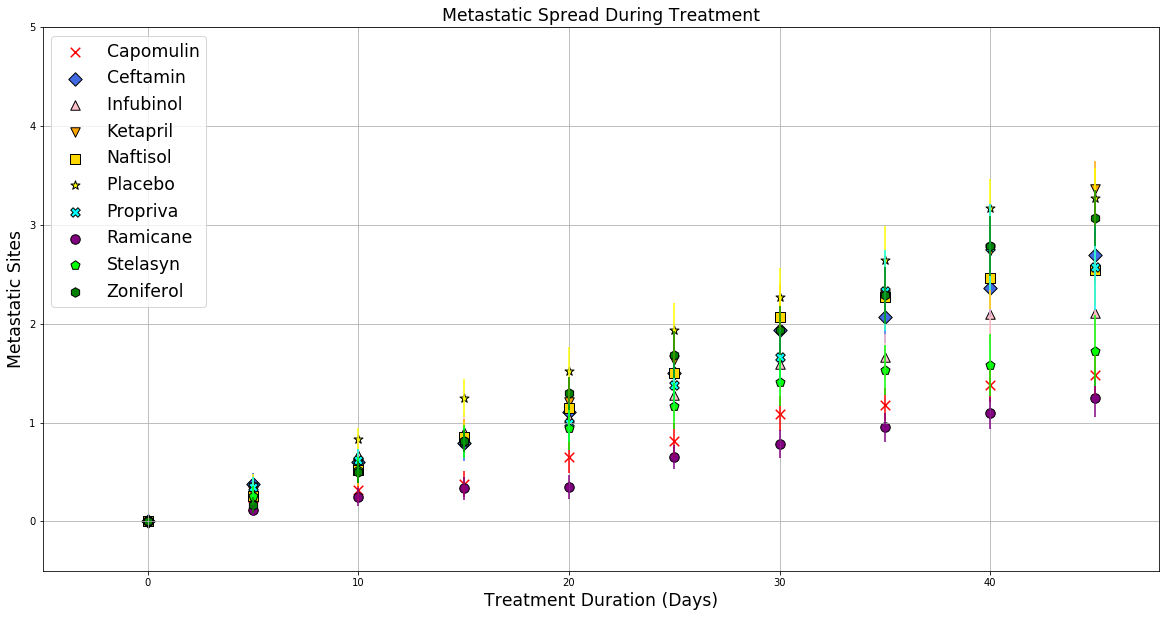

In [18]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(20,10))
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Capomulin'], s=90, marker='x', facecolors='red',edgecolors="black",label="Capomulin")
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Ceftamin'], s=90, marker='D', facecolors='royalblue',edgecolors="black",label='Ceftamin')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Infubinol'], s=90, marker='^', facecolors='pink',edgecolors="black",label='Infubinol ')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Ketapril'], s=90, marker='v', facecolors='orange',edgecolors="black",label='Ketapril')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Naftisol'], s=90, marker='s', facecolors='gold',edgecolors="black",label='Naftisol')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Placebo'], s=90, marker='*', facecolors='yellow',edgecolors="black",label='Placebo ')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Propriva'], s=90, marker='X', facecolors='cyan',edgecolors="black",label='Propriva')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Ramicane'], s=90, marker='o', facecolors='purple',edgecolors="black",label='Ramicane')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Stelasyn'], s=90, marker='p', facecolors='lime',edgecolors="black",label='Stelasyn')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Zoniferol'], s=90, marker='h', facecolors='green',edgecolors="black",label='Zoniferol')
plt.legend(loc="best",fontsize="xx-large") 

plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Capomulin'],yerr=reformatted_se_df['Capomulin'],ecolor='red',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Ceftamin'],yerr=reformatted_se_df['Ceftamin'],ecolor='royalblue',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Infubinol'],yerr=reformatted_se_df['Infubinol'],ecolor='pink',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Ketapril'],yerr=reformatted_se_df['Ketapril'],ecolor='orange',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Naftisol'],yerr=reformatted_se_df['Naftisol'],ecolor='gold',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Placebo'],yerr=reformatted_se_df['Placebo'],ecolor='yellow',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Propriva'],yerr=reformatted_se_df['Propriva'],ecolor='cyan',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Ramicane'],yerr=reformatted_se_df['Ramicane'],ecolor='purple',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Stelasyn'],yerr=reformatted_se_df['Stelasyn'],ecolor='lime',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Zoniferol'],yerr=reformatted_se_df['Zoniferol'],ecolor='green',fmt='none')

plt.title("Metastatic Spread During Treatment",fontsize="xx-large")
plt.xlabel("Treatment Duration (Days)",fontsize="xx-large")
plt.ylabel("Metastatic Sites",fontsize="xx-large")

plt.xlim(-5, 48)
plt.ylim(-.5, 5)

plt.grid()

# Save the Figure

plt.savefig("metastatic_spread.png", bbox_inches="tight")


# Show the Figure


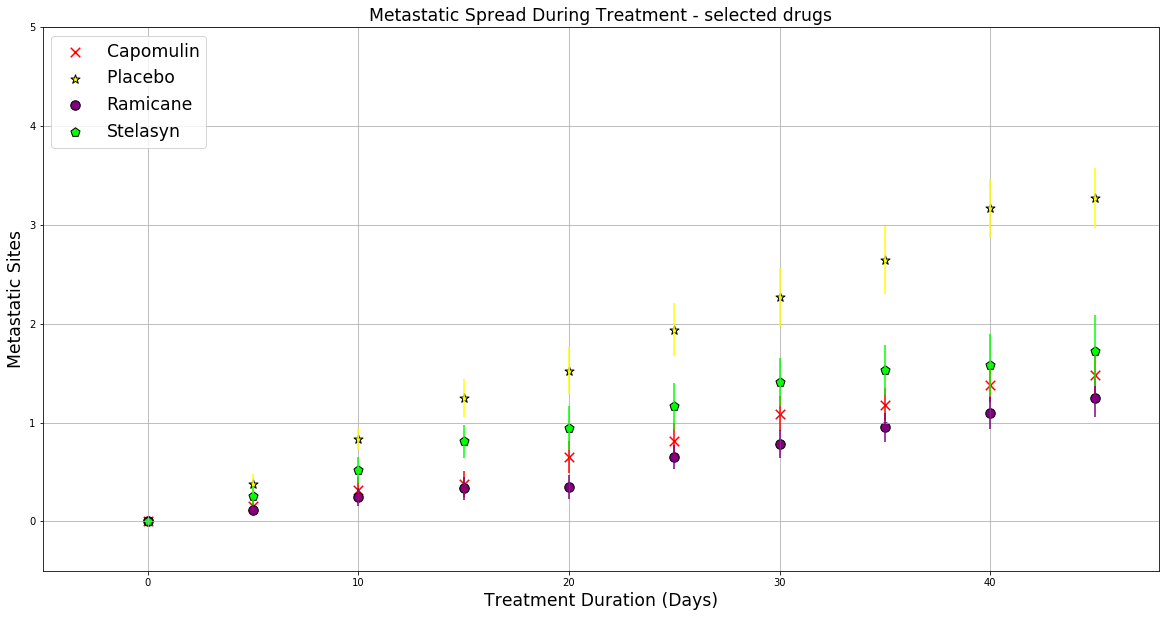

In [19]:
# again, comprehensive but harder to read than it should be.
# Let's demonstrate that a chart based on a selected subset can be easier to read.

plt.figure(figsize=(20,10))

plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Capomulin'], s=90, marker='x', facecolors='red',edgecolors="black",label="Capomulin")
#plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Ceftamin'], s=90, marker='D', facecolors='royalblue',edgecolors="black",label='Ceftamin')
#plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Infubinol'], s=90, marker='^', facecolors='pink',edgecolors="black",label='Infubinol ')
#plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Ketapril'], s=90, marker='v', facecolors='orange',edgecolors="black",label='Ketapril')
#plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Naftisol'], s=90, marker='s', facecolors='gold',edgecolors="black",label='Naftisol')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Placebo'], s=90, marker='*', facecolors='yellow',edgecolors="black",label='Placebo ')
#plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Propriva'], s=90, marker='X', facecolors='cyan',edgecolors="black",label='Propriva')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Ramicane'], s=90, marker='o', facecolors='purple',edgecolors="black",label='Ramicane')
plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Stelasyn'], s=90, marker='p', facecolors='lime',edgecolors="black",label='Stelasyn')
#plt.scatter(reformatted2_df['Timepoint'], reformatted2_df['Zoniferol'], s=90, marker='h', facecolors='green',edgecolors="black",label='Zoniferol')
plt.legend(loc="upper left",fontsize="xx-large") 

plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Capomulin'],yerr=reformatted_se_df['Capomulin'],ecolor='red',fmt='none')
#plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Ceftamin'],yerr=reformatted_se_df['Ceftamin'],ecolor='royalblue',fmt='none')
#plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Infubinol'],yerr=reformatted_se_df['Infubinol'],ecolor='pink',fmt='none')
#plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Ketapril'],yerr=reformatted_se_df['Ketapril'],ecolor='orange',fmt='none')
#plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Naftisol'],yerr=reformatted_se_df['Naftisol'],ecolor='gold',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Placebo'],yerr=reformatted_se_df['Placebo'],ecolor='yellow',fmt='none')
#plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Propriva'],yerr=reformatted_se_df['Propriva'],ecolor='cyan',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Ramicane'],yerr=reformatted_se_df['Ramicane'],ecolor='purple',fmt='none')
plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Stelasyn'],yerr=reformatted_se_df['Stelasyn'],ecolor='lime',fmt='none')
#plt.errorbar(reformatted2_df['Timepoint'], reformatted2_df['Zoniferol'],yerr=reformatted_se_df['Zoniferol'],ecolor='green',fmt='none')

plt.title("Metastatic Spread During Treatment - selected drugs",fontsize="xx-large")
plt.xlabel("Treatment Duration (Days)",fontsize="xx-large")
plt.ylabel("Metastatic Sites",fontsize="xx-large")

plt.xlim(-5, 48)
plt.ylim(-.5, 5)
# the y upper limit could be adjusted based on which drugs are selected

plt.grid()


## Survival Rates

In [20]:
combine_drug_timepoint_gb = combinex_df.groupby(['Drug','Timepoint'])
# trouble ahead... using the original "combinex" combined df so that we can demonstrate it

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_drug_timepoint = combine_drug_timepoint_gb['Mouse ID'].count()

# Convert to DataFrame
count_mice_drug_timepoint_df = pd.DataFrame(count_mice_drug_timepoint)
count_mice_drug_timepoint_df.reset_index(inplace=True)

# Preview DataFrame
print(count_mice_drug_timepoint_df)




         Drug  Timepoint  Mouse ID
0   Capomulin          0        25
1   Capomulin          5        25
2   Capomulin         10        25
3   Capomulin         15        24
4   Capomulin         20        23
5   Capomulin         25        22
6   Capomulin         30        22
7   Capomulin         35        22
8   Capomulin         40        21
9   Capomulin         45        21
10   Ceftamin          0        25
11   Ceftamin          5        21
12   Ceftamin         10        20
13   Ceftamin         15        19
14   Ceftamin         20        18
15   Ceftamin         25        18
16   Ceftamin         30        16
17   Ceftamin         35        14
18   Ceftamin         40        14
19   Ceftamin         45        13
20  Infubinol          0        25
21  Infubinol          5        25
22  Infubinol         10        21
23  Infubinol         15        21
24  Infubinol         20        20
25  Infubinol         25        18
26  Infubinol         30        17
27  Infubinol       

In [21]:
Stelasyn_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Stelasyn"])
Stelasyn_df = Stelasyn_df.rename(columns={"Mouse ID":"Stelasyn"})
del Stelasyn_df["Drug"]

Naftisol_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Naftisol"])
Naftisol_df = Naftisol_df.rename(columns={"Mouse ID":"Naftisol"})
del Naftisol_df["Drug"]

Ketapril_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Ketapril"])
Ketapril_df = Ketapril_df.rename(columns={"Mouse ID":"Ketapril"})
del Ketapril_df["Drug"]

Capomulin_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Capomulin"])
Capomulin_df = Capomulin_df.rename(columns={"Mouse ID":"Capomulin"})
del Capomulin_df["Drug"]

Infubinol_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Infubinol"])
Infubinol_df = Infubinol_df.rename(columns={"Mouse ID":"Infubinol"})
del Infubinol_df["Drug"]

Ceftamin_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Ceftamin"])
Ceftamin_df = Ceftamin_df.rename(columns={"Mouse ID":"Ceftamin"})
del Ceftamin_df["Drug"]

Propriva_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Propriva"])
Propriva_df = Propriva_df.rename(columns={"Mouse ID":"Propriva"})
del Propriva_df["Drug"]

Zoniferol_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Zoniferol"])
Zoniferol_df = Zoniferol_df.rename(columns={"Mouse ID":"Zoniferol"})
del Zoniferol_df["Drug"]

Ramicane_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Ramicane"])
Ramicane_df = Ramicane_df.rename(columns={"Mouse ID":"Ramicane"})
del Ramicane_df["Drug"]

Placebo_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Placebo"])
Placebo_df = Placebo_df.rename(columns={"Mouse ID":"Placebo"})
del Placebo_df["Drug"]

reformatted3_df = pd.merge(Capomulin_df, Ceftamin_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Infubinol_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Ketapril_df,on="Timepoint")                                   
reformatted3_df = pd.merge(reformatted3_df,Naftisol_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Placebo_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Propriva_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Ramicane_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Stelasyn_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Zoniferol_df,on="Timepoint")

reformatted3_df



,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


Now wait just a minute!  Is it strange that "Stelasyn" and "Propriva" trials begin with 26 mice
whereas all the other trials begin with 25?

In [22]:
# Just how many mice did we begin with anyway?
print (mouse_drug_df.count())
print (mouse_drug_df["Mouse ID"].value_counts())

Mouse ID    250
Drug        250
dtype: int64
g989    2
r701    1
f932    1
m546    1
c832    1
l872    1
a963    1
c559    1
c282    1
c895    1
o287    1
d251    1
n763    1
c458    1
q633    1
b447    1
v991    1
w575    1
v199    1
w746    1
w167    1
s141    1
g288    1
j296    1
w914    1
u946    1
a366    1
i557    1
o331    1
s337    1
       ..
p981    1
n923    1
o795    1
k894    1
w150    1
g867    1
m957    1
k754    1
r921    1
x822    1
q610    1
r850    1
t994    1
e213    1
t724    1
q597    1
h428    1
p387    1
a444    1
i334    1
o302    1
w540    1
a411    1
v603    1
n630    1
p310    1
p136    1
x226    1
s152    1
i635    1
Name: Mouse ID, Length: 249, dtype: int64


In [23]:
# And what drug was Mouse ID g989 given?
print(mouse_drug_df.loc[mouse_drug_df["Mouse ID"] == "g989", :])

    Mouse ID      Drug
7       g989  Stelasyn
173     g989  Propriva


A-ha!  I think it's a pretty fair assumption that one mouse was not put through two different drug trials.
Therefore, we've put in a frantic call to the lab for a correction/clarification of their data.
Meanwhile, we will disregard the g989 data.

In [24]:
# let's try this again with data where data for mouse "g989" has been dropped
combine_drug_timepoint_gb = combine_df.groupby(['Drug','Timepoint'])


# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_drug_timepoint = combine_drug_timepoint_gb['Mouse ID'].count()

# Convert to DataFrame
count_mice_drug_timepoint_df = pd.DataFrame(count_mice_drug_timepoint)
count_mice_drug_timepoint_df.reset_index(inplace=True)

# Preview DataFrame
print(count_mice_drug_timepoint_df)



         Drug  Timepoint  Mouse ID
0   Capomulin          0        25
1   Capomulin          5        25
2   Capomulin         10        25
3   Capomulin         15        24
4   Capomulin         20        23
5   Capomulin         25        22
6   Capomulin         30        22
7   Capomulin         35        22
8   Capomulin         40        21
9   Capomulin         45        21
10   Ceftamin          0        25
11   Ceftamin          5        21
12   Ceftamin         10        20
13   Ceftamin         15        19
14   Ceftamin         20        18
15   Ceftamin         25        18
16   Ceftamin         30        16
17   Ceftamin         35        14
18   Ceftamin         40        14
19   Ceftamin         45        13
20  Infubinol          0        25
21  Infubinol          5        25
22  Infubinol         10        21
23  Infubinol         15        21
24  Infubinol         20        20
25  Infubinol         25        18
26  Infubinol         30        17
27  Infubinol       

In [25]:
Stelasyn_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Stelasyn"])
Stelasyn_df = Stelasyn_df.rename(columns={"Mouse ID":"Stelasyn"})
del Stelasyn_df["Drug"]

Naftisol_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Naftisol"])
Naftisol_df = Naftisol_df.rename(columns={"Mouse ID":"Naftisol"})
del Naftisol_df["Drug"]

Ketapril_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Ketapril"])
Ketapril_df = Ketapril_df.rename(columns={"Mouse ID":"Ketapril"})
del Ketapril_df["Drug"]

Capomulin_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Capomulin"])
Capomulin_df = Capomulin_df.rename(columns={"Mouse ID":"Capomulin"})
del Capomulin_df["Drug"]

Infubinol_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Infubinol"])
Infubinol_df = Infubinol_df.rename(columns={"Mouse ID":"Infubinol"})
del Infubinol_df["Drug"]

Ceftamin_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Ceftamin"])
Ceftamin_df = Ceftamin_df.rename(columns={"Mouse ID":"Ceftamin"})
del Ceftamin_df["Drug"]

Propriva_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Propriva"])
Propriva_df = Propriva_df.rename(columns={"Mouse ID":"Propriva"})
del Propriva_df["Drug"]

Zoniferol_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Zoniferol"])
Zoniferol_df = Zoniferol_df.rename(columns={"Mouse ID":"Zoniferol"})
del Zoniferol_df["Drug"]

Ramicane_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Ramicane"])
Ramicane_df = Ramicane_df.rename(columns={"Mouse ID":"Ramicane"})
del Ramicane_df["Drug"]

Placebo_df = pd.DataFrame(count_mice_drug_timepoint_df[count_mice_drug_timepoint_df["Drug"] == "Placebo"])
Placebo_df = Placebo_df.rename(columns={"Mouse ID":"Placebo"})
del Placebo_df["Drug"]

reformatted3_df = pd.merge(Capomulin_df, Ceftamin_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Infubinol_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Ketapril_df,on="Timepoint")                                   
reformatted3_df = pd.merge(reformatted3_df,Naftisol_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Placebo_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Propriva_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Ramicane_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Stelasyn_df,on="Timepoint")
reformatted3_df = pd.merge(reformatted3_df,Zoniferol_df,on="Timepoint")

reformatted3_df


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,24,25,24,25
1,5,25,21,25,23,23,24,23,25,23,24
2,10,25,20,21,22,21,24,21,24,21,22
3,15,24,19,21,19,21,20,15,24,21,21
4,20,23,18,20,19,20,19,15,23,19,17
5,25,22,18,18,19,18,17,13,23,18,16
6,30,22,16,17,18,15,15,12,23,17,15
7,35,22,14,12,17,15,14,9,21,15,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [26]:
# since we aren't starting with a consistent number of mice, it's all the more important to convert to percentages

reformatted3_df["Capomulin"] = reformatted3_df.apply(lambda row: row["Capomulin"] * 100 / 25, axis=1)
reformatted3_df["Ceftamin"]  = reformatted3_df.apply(lambda row: row["Ceftamin"]  * 100 / 25, axis=1)
reformatted3_df["Infubinol"] = reformatted3_df.apply(lambda row: row["Infubinol"] * 100 / 25, axis=1)
reformatted3_df["Ketapril"]  = reformatted3_df.apply(lambda row: row["Ketapril"]  * 100 / 25, axis=1)
reformatted3_df["Naftisol"]  = reformatted3_df.apply(lambda row: row["Naftisol"]  * 100 / 25, axis=1)
reformatted3_df["Placebo"]   = reformatted3_df.apply(lambda row: row["Placebo"]   * 100 / 25, axis=1)
reformatted3_df["Propriva"]  = reformatted3_df.apply(lambda row: row["Propriva"]  * 100 / 24, axis=1)
reformatted3_df["Ramicane"]  = reformatted3_df.apply(lambda row: row["Ramicane"]  * 100 / 25, axis=1)
reformatted3_df["Stelasyn"]  = reformatted3_df.apply(lambda row: row["Stelasyn"]  * 100 / 24, axis=1)
reformatted3_df["Zoniferol"] = reformatted3_df.apply(lambda row: row["Zoniferol"] * 100 / 25, axis=1)
# the divisors, of course, chosen from timepoint 0 of the table immediately above


In [27]:
# Preview the Data Frame
display(reformatted3_df)


,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,95.833333,100.0,95.833333,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,87.500000,96.0,87.500000,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,62.500000,96.0,87.500000,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,62.500000,92.0,79.166667,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,54.166667,92.0,75.000000,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,70.833333,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,37.500000,84.0,62.500000,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,37.500000,80.0,50.000000,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,29.166667,80.0,45.833333,56.0


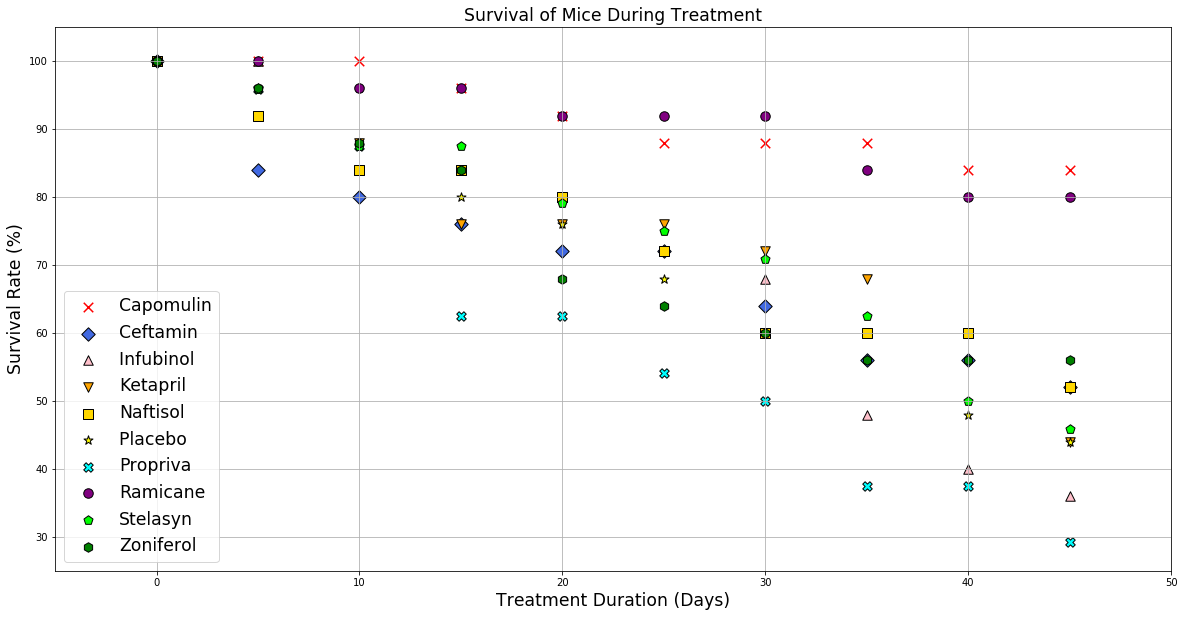

In [29]:
plt.figure(figsize=(20,10))

plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Capomulin'], marker='x', facecolors='red',edgecolors="black",s=90,label="Capomulin")
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Ceftamin'], marker='D', facecolors='royalblue',edgecolors="black",s=90,label='Ceftamin')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Infubinol'], marker='^', facecolors='pink',edgecolors="black",s=90,label='Infubinol ')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Ketapril'], marker='v', facecolors='orange',edgecolors="black",s=90,label='Ketapril')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Naftisol'], marker='s', facecolors='gold',edgecolors="black",s=90,label='Naftisol')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Placebo'], marker='*', facecolors='yellow',edgecolors="black",s=90,label='Placebo ')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Propriva'], marker='X', facecolors='cyan',edgecolors="black",s=90,label='Propriva')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Ramicane'], marker='o', facecolors='purple',edgecolors="black",s=90,label='Ramicane')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Stelasyn'], marker='p', facecolors='lime',edgecolors="black",s=90,label='Stelasyn')
plt.scatter(reformatted3_df['Timepoint'], reformatted3_df['Zoniferol'], marker='h', facecolors='green',edgecolors="black",s=90,label='Zoniferol')
plt.legend(loc="lower left",fontsize="xx-large") 

plt.title("Survival of Mice During Treatment",fontsize="xx-large")
plt.xlabel("Treatment Duration (Days)",fontsize="xx-large")
plt.ylabel("Survival Rate (%)",fontsize="xx-large")

plt.xlim(-5, 50)
plt.ylim(25, 105)

plt.grid()

# Save the Figure


plt.savefig("survival.png", bbox_inches="tight")


## Summary Bar Graph

In [34]:
# Calculate the percent changes for each drug

# a review of the reformatted_df from which we originally charted tumor growth:
#del reformatted_df["Timepoint"]      # at this point, "Timepoint" just gets in the way
display(reformatted_df)
    
label_list = reformatted_df.columns.values.tolist()
print (label_list)

pct_changed_list = []
x = 0
for label in label_list:
    pct_changed = 100 * (reformatted_df.iloc[9,x] - reformatted_df.iloc[0,x]) / reformatted_df.iloc[0,x]
    pct_changed_list.append(pct_changed)
    print(label, reformatted_df.iloc[0,x], reformatted_df.iloc[9,x], pct_changed)
    x += 1
    
reformatted4_df = pd.DataFrame({"Drug" : label_list,
                               "Pct Changed": pct_changed_list})
sorted_df = reformatted4_df.sort_values("Pct Changed")
sorted_df.reset_index(inplace=True,drop=True)
display(sorted_df)











,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
2,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
3,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
4,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
5,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
6,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
7,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
8,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
Capomulin 45.0 36.23611379944762 -19.475302667894173
Ceftamin 45.0 64.13242133515385 42.51649185589744
Infubinol 45.0 65.75556227753334 46.12347172785188
Ketapril 45.0 70.66295760897273 57.028794686606076
Naftisol 45.0 69.26550621064615 53.92334713476923
Placebo 45.0 68.08408221741819 51.29796048315153
Propriva 45.0 66.25852868844287 47.24117486320637
Ramicane 45.0 34.955594791755 -22.320900462766673
Stelasyn 45.0 68.43831042955456 52.08513428789903
Zoniferol 45.0 65.96088788929286 46.57975086509525


,Drug,Pct Changed
0,Ramicane,-22.320900
1,Capomulin,-19.475303
2,Ceftamin,42.516492
3,Infubinol,46.123472
4,Zoniferol,46.579751
5,Propriva,47.241175
6,Placebo,51.297960
7,Stelasyn,52.085134
8,Naftisol,53.923347
9,Ketapril,57.028795


In [32]:
# add an extra entry or two temporarily for format testing
# of course these aren't real drug trials.  I just wanted to check
# that the formatting function works for values close to zero
addrow = pd.DataFrame({"Drug": ["Testingit","Testagin"],
                      "Pct Changed": [7, -4]})

sorted_df = sorted_df.append(addrow,ignore_index=True)
display(sorted_df)

# if you're interested in seeing the result of this test, check out "bargraph_test.png"

,Drug,Pct Changed
0,Ramicane,-22.320900
1,Capomulin,-19.475303
2,Ceftamin,42.516492
3,Infubinol,46.123472
4,Zoniferol,46.579751
5,Propriva,47.241175
6,Placebo,51.297960
7,Stelasyn,52.085134
8,Naftisol,53.923347
9,Ketapril,57.028795


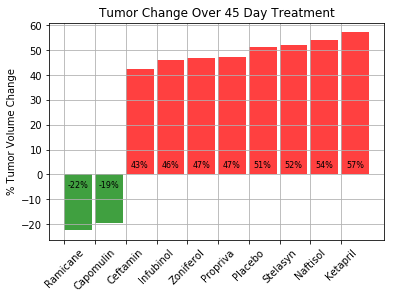

In [35]:
# Store all Relevant Percent Changes into a Tuple
Changes = (sorted_df["Pct Changed"])
Labels  = (sorted_df["Drug"])
           

# color our bars green or red depending on whether the trial result was good or bad
colors = []
for xxx in Changes:
    if xxx < 0:
        colors.append("g")
    else:
        colors.append("r")


# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(Labels))

barchart = plt.bar(x_axis, Changes, color = colors, alpha=0.75, align="edge", width=.9)

x = [value for value in x_axis]
plt.xticks(x,Labels,rotation=45)
plt.grid()

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


# Use functions to label the percentages of changes
def valuelabel(rects, ptext):

    x = 0
    for rect in rects:
        height = rect.get_height()
        if height > 10:
            ypos = 2
        elif height > 0:
            ypos = height + 1   # not enough room in the bar, so display just over it
        elif height > -10:
            ypos = height - 5
        else:
            ypos = -6
            
        plt.text(rect.get_x() + rect.get_width() / 2, ypos, ptext[x], ha="center", va="bottom", fontsize=8)
        x += 1
 

# Call functions to implement percentage labeling
chgx = pd.Series(["{:.0f}%".format(val) for val in Changes])
valuelabel(barchart, chgx)

# Save the Figure
plt.savefig("tumor_change_45days.png", bbox_inches="tight")

